In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from datetime import datetime

In [70]:
# # Read CSV files into DataFrames
# fuelDensity = pd.read_csv("fuelDensity.csv")
# fuelTemp = pd.read_csv("fuelTemp.csv")
# fuelVolumeFlowRate = pd.read_csv("fuelVolumeFlowRate.csv")
# inclinometer_raw = pd.read_csv("inclinometer-raw.csv")
# latitude = pd.read_csv("latitude.csv")
# longitude = pd.read_csv("longitude.csv")
# level1median = pd.read_csv("level1median.csv")
# level2median = pd.read_csv("level2median.csv")
# longitudinalWaterSpeed = pd.read_csv("longitudinalWaterSpeed.csv")
# portPitch = pd.read_csv("portPitch.csv")
# portRudder = pd.read_csv("portRudder.csv")
# speedKmh = pd.read_csv("speedKmh.csv")
# speedKnots = pd.read_csv("speedKnots.csv")
# starboardPitch = pd.read_csv("starboardPitch.csv")
# starboardRudder = pd.read_csv("starboardRudder.csv")
# trackDegreeMagnetic = pd.read_csv("trackDegreeMagnetic.csv")
# trackDegreeTrue = pd.read_csv("trackDegreeTrue.csv")
# trueHeading = pd.read_csv("trueHeading.csv")
# windAngle = pd.read_csv("windAngle.csv")
# windSpeed = pd.read_csv("windSpeed.csv")

# Datasets can be downloaded from the below links
listOfCsv = [
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/fuelDensity.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/fuelTemp.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/fuelVolumeFlowRate.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/inclinometer-raw.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/latitude.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/portPitch.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/portRudder.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/speedKmh.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/speedKnots.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/longitude.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/level1median.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/level2median.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/longitudinalWaterSpeed.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/trackDegreeTrue.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/trueHeading.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/windAngle.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/windSpeed.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/starboardPitch.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/starboardRudder.csv",
  "https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/trackDegreeMagnetic.csv",
]

In [3]:
# List of file names
file_names = [
    "fuelDensity.csv", "fuelTemp.csv", "fuelVolumeFlowRate.csv",
    "inclinometer-raw.csv", "latitude.csv", "longitude.csv",
    "level1median.csv", "level2median.csv", "longitudinalWaterSpeed.csv",
    "portPitch.csv", "portRudder.csv", "speedKmh.csv", "speedKnots.csv",
    "starboardPitch.csv", "starboardRudder.csv", "trackDegreeMagnetic.csv",
    "trackDegreeTrue.csv", "trueHeading.csv", "windAngle.csv", "windSpeed.csv"
]

In [5]:
# Function to convert .NET ticks to timestamp
def convert_to_timestamp(ticks: float):
    unix_timestamp = (ticks - 621355968000000000) / 10_000_000 
    return pd.to_datetime(unix_timestamp, unit="s", errors="coerce")

# Function to convert DMS string to decimal degrees
def dms_to_decimal(dms_str):
    degrees = int(dms_str[:2]) 
    minutes = float(dms_str[2:-1]) 
    direction = dms_str[-1]  
    
    decimal_degrees = degrees + (minutes / 60)
    
    # Apply sign based on direction
    if direction in ['S', 'W']:
        decimal_degrees = -decimal_degrees
    
    return decimal_degrees

dataframes = {}

for file in file_names:
    feature_name = file.split('.')[0]
    df = pd.read_csv(file, names=["timeStamp", feature_name])
    
    # Convert .NET ticks to timestamp
    df["timeStamp"] = convert_to_timestamp(df["timeStamp"])
    
    if feature_name == "latitude" or feature_name == "longitude":
        df[feature_name] = df[feature_name].apply(dms_to_decimal)
    
    df.set_index("timeStamp", inplace=True)
    
    resampled_df = df.resample("h").mean() 
    
    dataframes[feature_name] = resampled_df

# Merge all resampled dataframes on 'timeStamp'
merged_df = None
for _, df in dataframes.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, left_index=True, right_index=True, how="outer")


print(merged_df.head())

                     fuelDensity  fuelTemp  fuelVolumeFlowRate  \
timeStamp                                                        
2010-02-15 05:00:00          NaN       NaN                 NaN   
2010-02-15 06:00:00          NaN       NaN                 NaN   
2010-02-15 07:00:00          NaN       NaN                 NaN   
2010-02-15 08:00:00          NaN       NaN                 NaN   
2010-02-15 09:00:00          NaN       NaN                 NaN   

                     inclinometer-raw   latitude  longitude  level1median  \
timeStamp                                                                   
2010-02-15 05:00:00        357.368550  61.541955 -10.776402     16.689818   
2010-02-15 06:00:00        357.217611  61.700253 -10.627737     16.796165   
2010-02-15 07:00:00        357.229154  61.950977 -10.688893     16.668163   
2010-02-15 08:00:00        357.260413  61.912175 -10.688254     16.570587   
2010-02-15 09:00:00        357.220845  61.640855 -10.688170     16.604288  

In [7]:
merged_df.isna().sum().sum()

13086

In [9]:
merged_df.describe()

,fuelDensity,fuelTemp,fuelVolumeFlowRate,inclinometer-raw,latitude,longitude,level1median,level2median,longitudinalWaterSpeed,portPitch,portRudder,speedKmh,speedKnots,starboardPitch,starboardRudder,trackDegreeMagnetic,trackDegreeTrue,trueHeading,windAngle,windSpeed
count,688.000000,688.000000,688.000000,709.000000,712.000000,712.000000,712.000000,709.000000,712.000000,710.000000,710.000000,712.000000,712.000000,710.000000,710.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.927413,96.664808,0.553757,357.270992,61.762884,-10.712673,16.723558,14.657165,15.710617,6.825485,-0.759276,30.073919,16.238303,6.552352,0.432944,173.700618,172.449166,176.590469,166.072074,12.932243
std,0.003802,5.056462,0.108791,0.107674,0.168682,0.060631,0.240185,0.299787,4.936595,2.070294,1.454173,8.438643,4.556297,2.430154,1.283018,69.544081,68.222983,75.630077,97.581275,5.919682
min,0.922998,36.758397,0.000000,356.998870,61.541850,-10.910773,15.294146,9.457427,-2.078846,-2.356852,-8.223105,0.000000,0.000000,-3.668316,-3.301759,0.200000,10.522008,3.495533,8.549444,0.000000
25%,0.925506,96.334435,0.521527,357.216231,61.594898,-10.752871,16.564614,14.543424,14.910191,6.435552,-0.948190,28.593822,15.438076,6.045743,-0.075875,125.577183,128.858433,137.575077,77.237083,8.162853
50%,0.926265,97.485649,0.584205,357.266871,61.771668,-10.710096,16.711742,14.678972,16.907317,7.460010,-0.168095,32.217966,17.394479,7.347688,0.004486,182.797921,177.054463,181.784218,168.173333,12.066957
75%,0.928119,98.211170,0.621373,357.323951,61.932013,-10.661801,16.886951,14.813045,18.910017,8.159680,-0.051111,35.221734,19.016733,8.110888,0.483386,220.330150,217.842561,226.959384,259.782617,17.090500
max,0.964804,103.346864,0.692988,357.698031,62.051902,-10.586400,17.678436,15.335436,20.629834,8.799020,8.158667,41.759278,22.546365,8.763531,8.522026,321.563161,353.000000,359.355000,332.906111,31.179222


In [11]:
hourly_df = merged_df.copy()

In [13]:
hourly_df = hourly_df.dropna()
print(hourly_df.isna().sum().sum())

0


In [17]:
print(hourly_df.columns)

Index(['fuelDensity', 'fuelTemp', 'fuelVolumeFlowRate', 'inclinometer-raw',
       'latitude', 'longitude', 'level1median', 'level2median',
       'longitudinalWaterSpeed', 'portPitch', 'portRudder', 'speedKmh',
       'speedKnots', 'starboardPitch', 'starboardRudder',
       'trackDegreeMagnetic', 'trackDegreeTrue', 'trueHeading', 'windAngle',
       'windSpeed'],
      dtype='object')


In [19]:
hourly_df["energyConsumption"] = (hourly_df["fuelDensity"] * hourly_df["fuelVolumeFlowRate"] * 3600) / 1000
print(hourly_df[["fuelDensity", "fuelVolumeFlowRate", "energyConsumption"]].head())

                     fuelDensity  fuelVolumeFlowRate  energyConsumption
timeStamp                                                              
2010-02-16 12:00:00     0.931464            0.470666           1.578269
2010-02-16 13:00:00     0.926195            0.501743           1.672964
2010-02-16 14:00:00     0.925123            0.499402           1.663229
2010-02-16 15:00:00     0.925057            0.387270           1.289688
2010-02-17 06:00:00     0.930600            0.587373           1.967794


In [21]:
print(hourly_df["energyConsumption"].isna().sum())

0


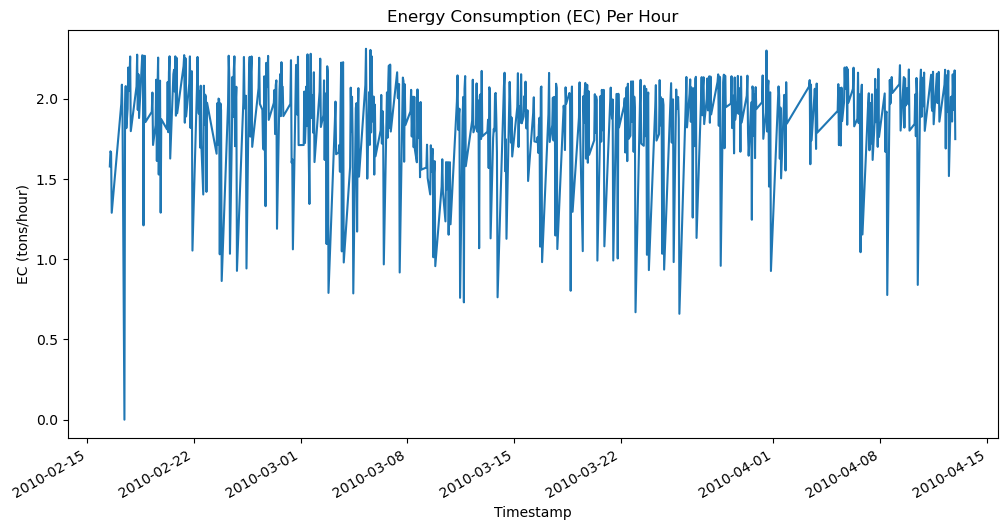

In [23]:
hourly_df["energyConsumption"].plot(figsize=(12,6), title="Energy Consumption (EC) Per Hour")
plt.ylabel("EC (tons/hour)")
plt.xlabel("Timestamp")
plt.show()

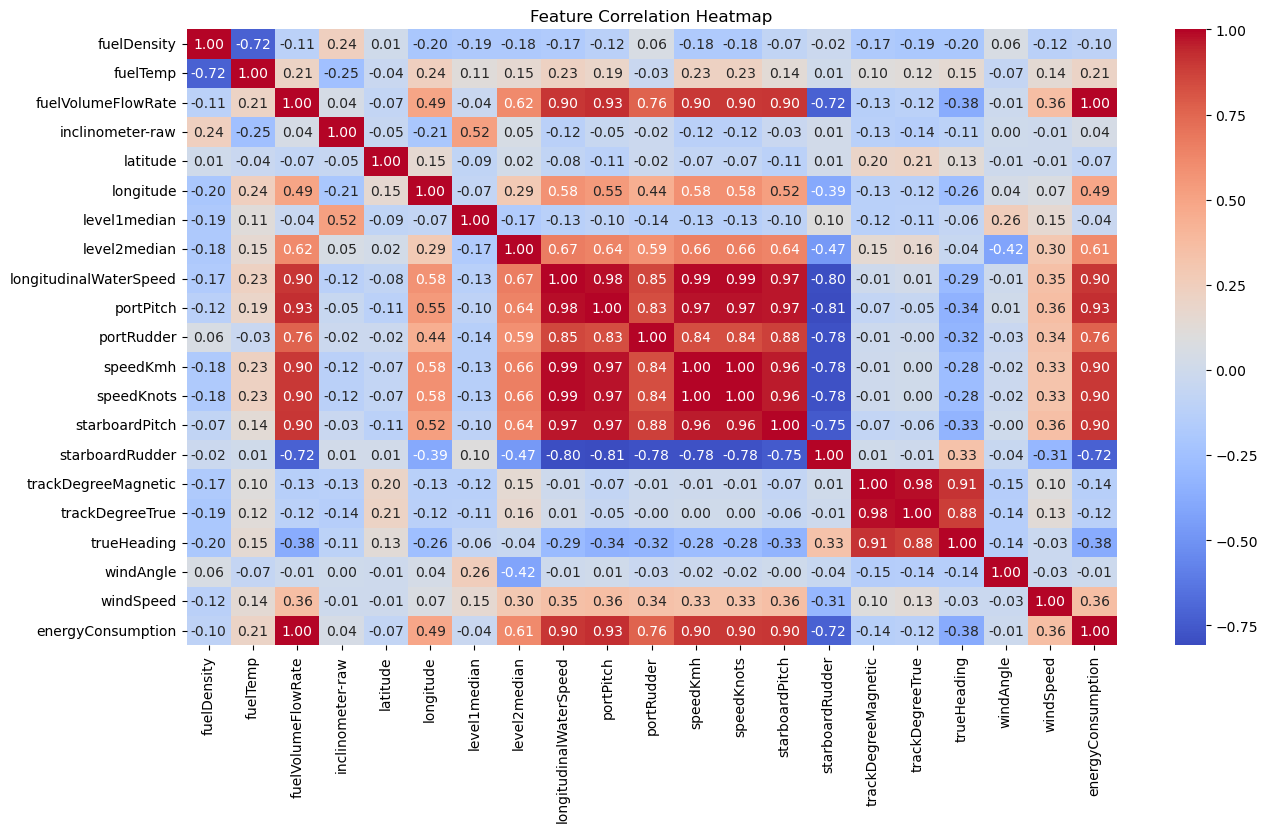

In [25]:
plt.figure(figsize=(15, 8))
sns.heatmap(hourly_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [109]:
correlation_matrix = hourly_df.corr()
ec_correlation = correlation_matrix["energyConsumption"].drop("energyConsumption")
print(ec_correlation)

fuelDensity              -0.099054
fuelTemp                  0.206363
fuelVolumeFlowRate        0.999876
inclinometer-raw          0.043607
latitude                 -0.072437
longitude                 0.488213
level1median             -0.036877
level2median              0.614292
longitudinalWaterSpeed    0.903090
portPitch                 0.925090
portRudder                0.761536
speedKmh                  0.897679
speedKnots                0.897677
starboardPitch            0.903612
starboardRudder          -0.719028
trackDegreeMagnetic      -0.137086
trackDegreeTrue          -0.119860
trueHeading              -0.380621
windAngle                -0.010761
windSpeed                 0.358079
Name: energyConsumption, dtype: float64


In [111]:
ec_correlation_sorted = ec_correlation.abs().sort_values(ascending=False)
print(ec_correlation_sorted)

fuelVolumeFlowRate        0.999876
portPitch                 0.925090
starboardPitch            0.903612
longitudinalWaterSpeed    0.903090
speedKmh                  0.897679
speedKnots                0.897677
portRudder                0.761536
starboardRudder           0.719028
level2median              0.614292
longitude                 0.488213
trueHeading               0.380621
windSpeed                 0.358079
fuelTemp                  0.206363
trackDegreeMagnetic       0.137086
trackDegreeTrue           0.119860
fuelDensity               0.099054
latitude                  0.072437
inclinometer-raw          0.043607
level1median              0.036877
windAngle                 0.010761
Name: energyConsumption, dtype: float64


In [113]:
#Removed fuelVolumeFlowRate feature as EC is calculated based on this and it has high impact
#Select features who has a correlation value of more than 0.3

selected_features = [
    "portPitch", "starboardPitch", "longitudinalWaterSpeed",
    "speedKmh", "speedKnots", "portRudder", "starboardRudder",
    "level2median", "longitude", "trueHeading", "windSpeed"
]

hourly_df_selected = hourly_df[selected_features + ["energyConsumption"]]
print(hourly_df_selected.head())

                     portPitch  starboardPitch  longitudinalWaterSpeed  \
timeStamp                                                                
2010-02-16 12:00:00   5.747796        7.078122               13.678667   
2010-02-16 13:00:00   6.942320        8.181388               18.157968   
2010-02-16 14:00:00   6.588657        7.872375               16.765092   
2010-02-16 15:00:00   3.935095        4.023595               11.124915   
2010-02-17 06:00:00   7.390354        7.094899               15.162706   

                      speedKmh  speedKnots  portRudder  starboardRudder  \
timeStamp                                                                 
2010-02-16 12:00:00  27.826796   15.024862   -0.277101         0.073891   
2010-02-16 13:00:00  35.861903   19.365727   -0.106311        -0.125639   
2010-02-16 14:00:00  29.342679   15.843385   -0.192681        -0.211416   
2010-02-16 15:00:00  22.068770   11.918610   -1.789312         1.364343   
2010-02-17 06:00:00  28.985421 

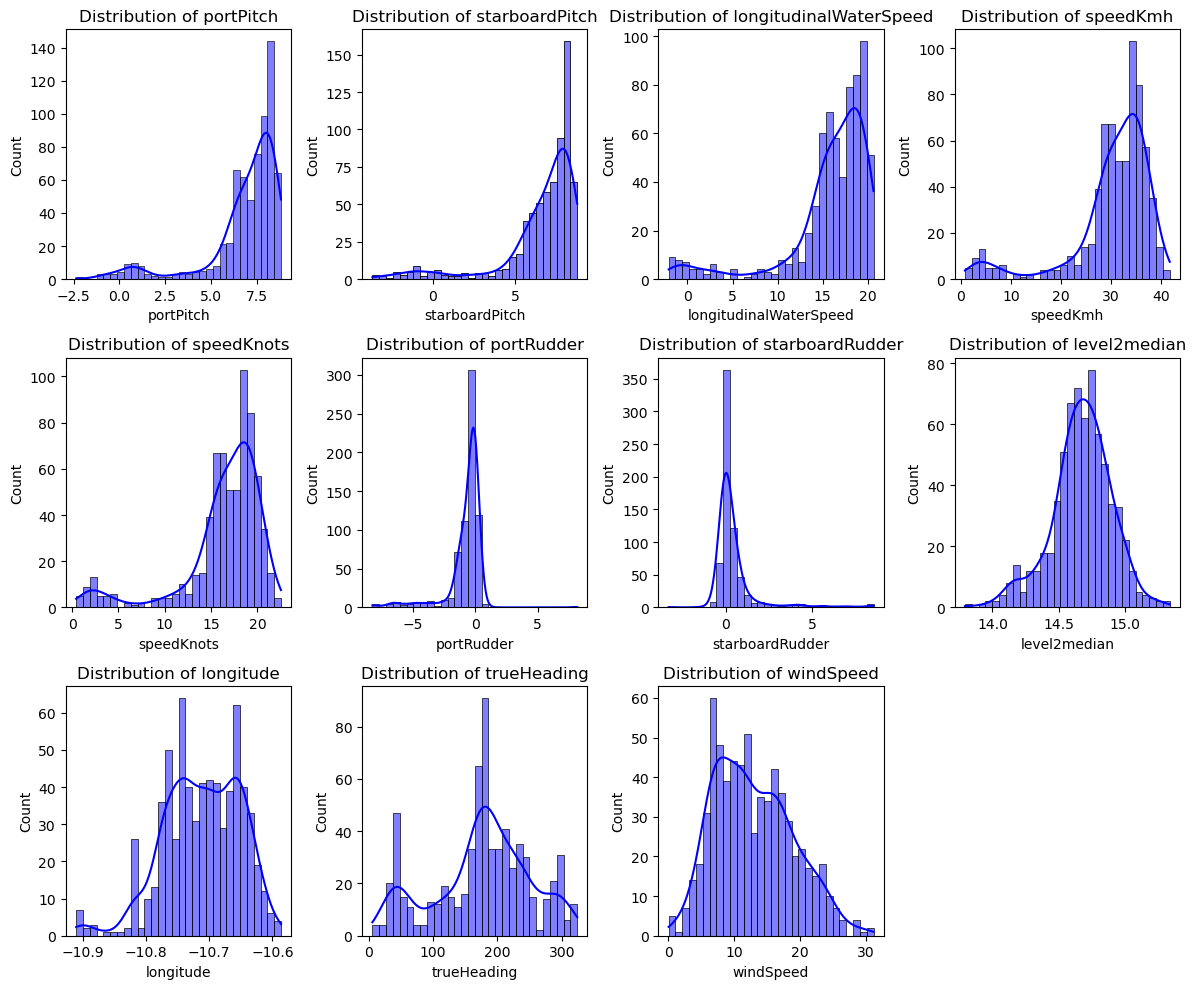

In [181]:
# Histograms and KDEs for each feature
plt.figure(figsize=(12, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(hourly_df_selected[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

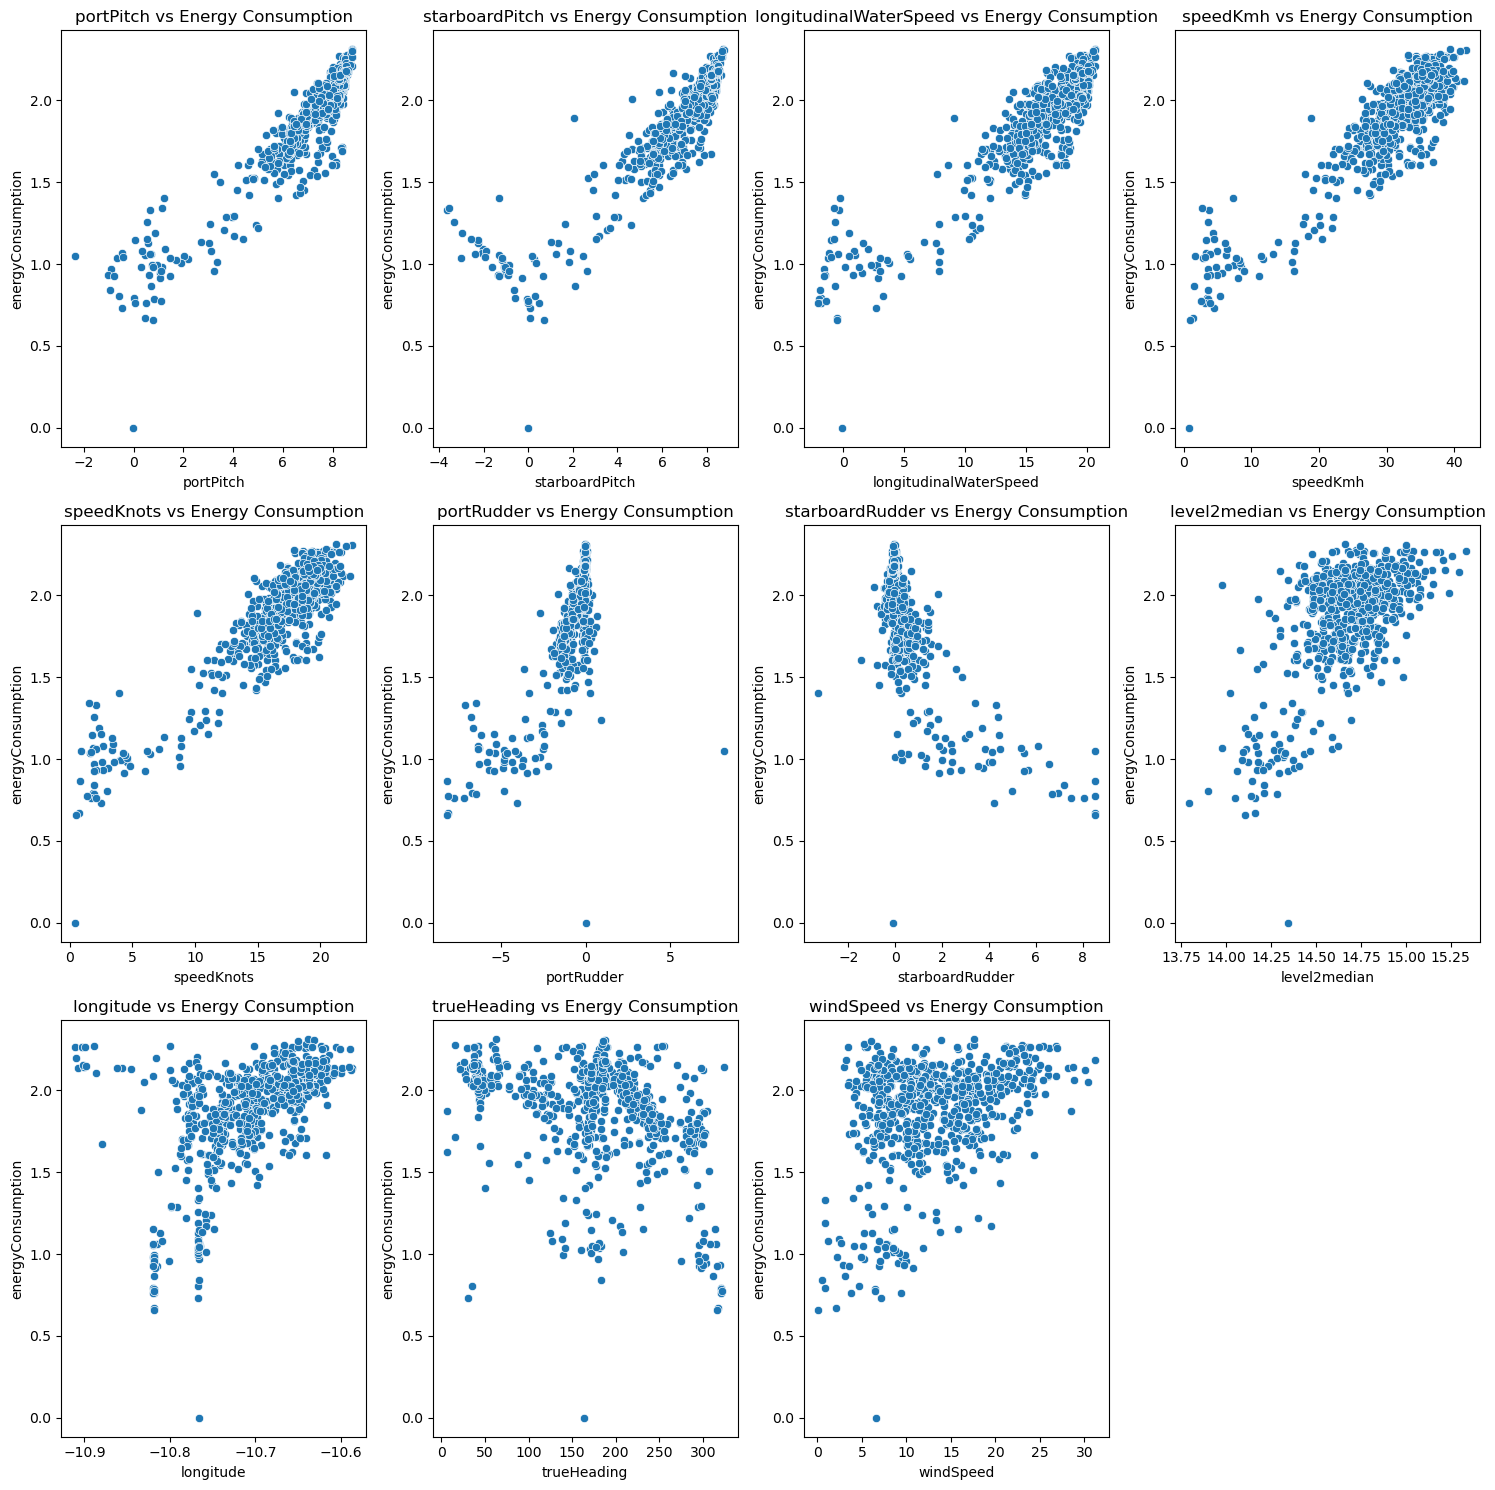

In [179]:
# Scatter plots for each feature vs energy consumption
plt.figure(figsize=(15, 15))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=hourly_df_selected[feature], y=hourly_df_selected['energyConsumption'])
    plt.title(f'{feature} vs Energy Consumption')
    plt.tight_layout()
plt.show()

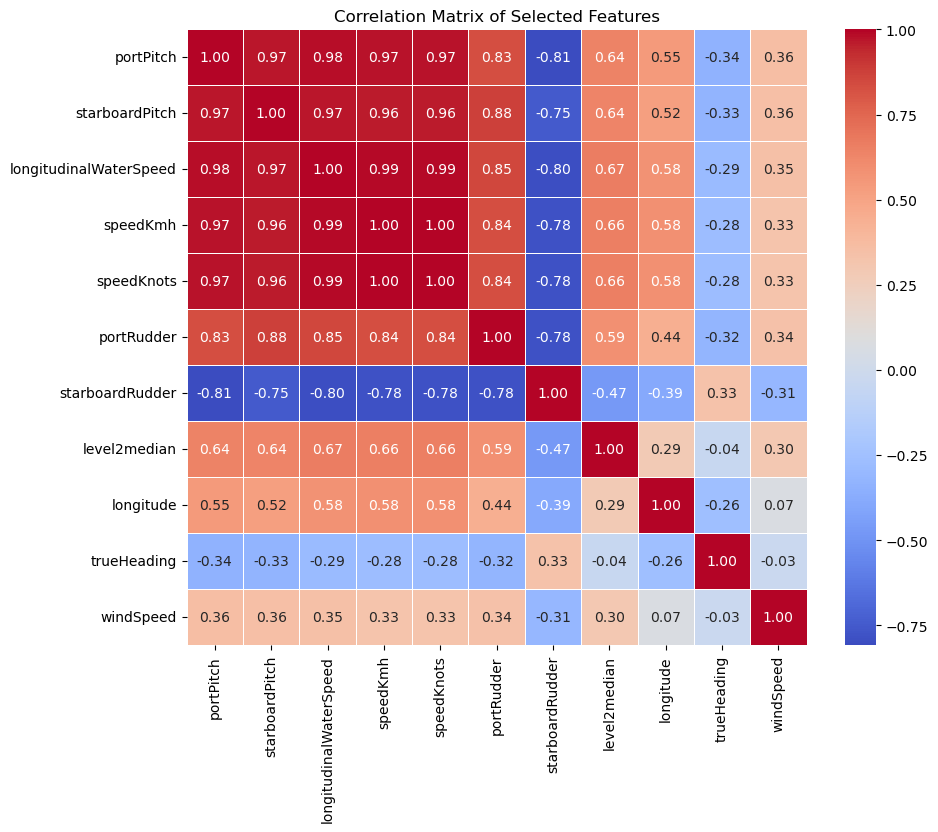

In [117]:
# Calculate the correlation matrix and plot heatmap
corr_matrix = hourly_df_selected[selected_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [121]:
final_df = hourly_df_selected.copy()

In [123]:
X = final_df[selected_features]  # Features
y = final_df['energyConsumption']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (546, 11)
Test set size: (137, 11)


In [169]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=10)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor - MAE: {mae_knn}")
print(f"KNN Regressor - MSE: {mse_knn}")
print(f"KNN Regressor - RMSE: {rmse_knn}")
print(f"KNN Regressor - R^2: {r2_knn}")


KNN Regressor - MAE: 0.093471924063568
KNN Regressor - MSE: 0.015548019855129566
KNN Regressor - RMSE: 0.12469169922304198
KNN Regressor - R^2: 0.8746807293480321


In [129]:
!pip install lightgbm

In [185]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'regression',  
    'metric': 'rmse',           
    'boosting_type': 'gbdt',    
    'num_leaves': 61,           
    'learning_rate': 0.05,      
    'feature_fraction': 0.9,   
    'bagging_fraction': 0.8,   
    'bagging_freq': 5,          
    'verbose': -1 
}

lgb_model = lgb.train(
    params, 
    train_data, 
    valid_sets=[test_data], 
    num_boost_round=1000, 
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(50)
    ]
    )

y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM - MAE: {mae_lgb}")
print(f"LightGBM - MSE: {mse_lgb}")
print(f"LightGBM - RMSE: {rmse_lgb}")
print(f"LightGBM - R^2: {r2_lgb}")


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 0.106137
[100]	valid_0's rmse: 0.0995931
[150]	valid_0's rmse: 0.0975712
[200]	valid_0's rmse: 0.0958292
Early stopping, best iteration is:
[183]	valid_0's rmse: 0.0949129
LightGBM - MAE: 0.06032597966215604
LightGBM - MSE: 0.009008463075951404
LightGBM - RMSE: 0.09491292365084643
LightGBM - R^2: 0.9273904951953764


In [187]:
# Create a summary comparison
print(f"KNN Regressor R²: {r2_knn}")
print(f"LGBM R²: {r2_lgb}")

KNN Regressor R²: 0.8746807293480321
LGBM R²: 0.9273904951953764


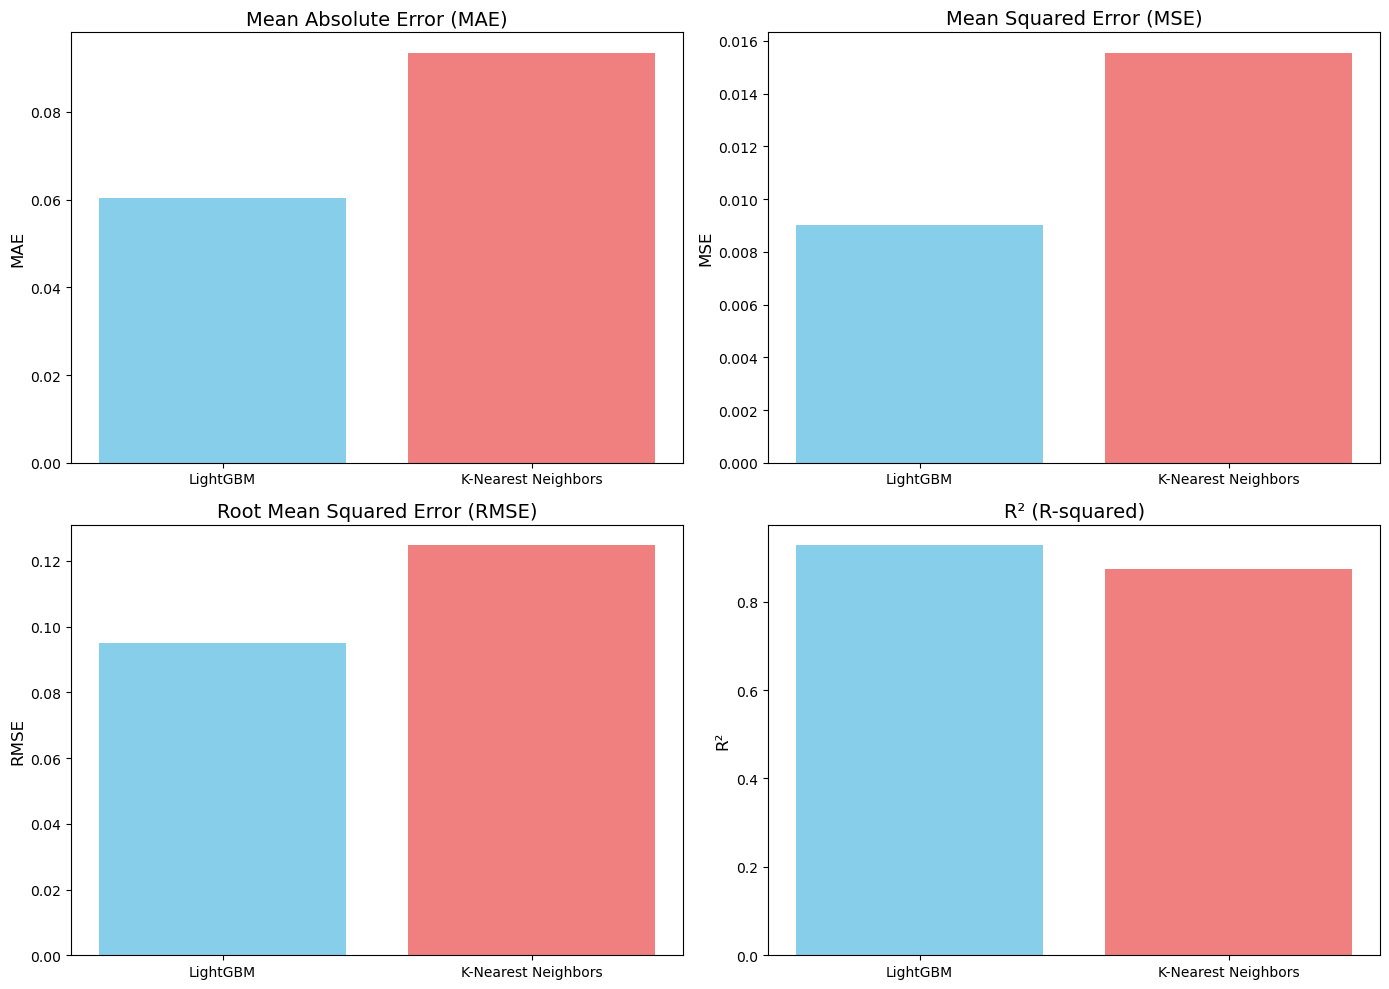

In [189]:
metrics = {
    "MAE": [mae_lgb, mae_knn],
    "MSE": [mse_lgb, mse_knn],
    "RMSE": [rmse_lgb, rmse_knn],
    "R²": [r2_lgb, r2_knn]
}

model_names = ['LightGBM', 'K-Nearest Neighbors']

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot MAE comparison
ax[0, 0].bar(model_names, metrics["MAE"], color=['skyblue', 'lightcoral'])
ax[0, 0].set_title('Mean Absolute Error (MAE)', fontsize=14)
ax[0, 0].set_ylabel('MAE', fontsize=12)

# Plot MSE comparison
ax[0, 1].bar(model_names, metrics["MSE"], color=['skyblue', 'lightcoral'])
ax[0, 1].set_title('Mean Squared Error (MSE)', fontsize=14)
ax[0, 1].set_ylabel('MSE', fontsize=12)

# Plot RMSE comparison
ax[1, 0].bar(model_names, metrics["RMSE"], color=['skyblue', 'lightcoral'])
ax[1, 0].set_title('Root Mean Squared Error (RMSE)', fontsize=14)
ax[1, 0].set_ylabel('RMSE', fontsize=12)

# Plot R² comparison
ax[1, 1].bar(model_names, metrics["R²"], color=['skyblue', 'lightcoral'])
ax[1, 1].set_title('R² (R-squared)', fontsize=14)
ax[1, 1].set_ylabel('R²', fontsize=12)

plt.tight_layout()
plt.show()


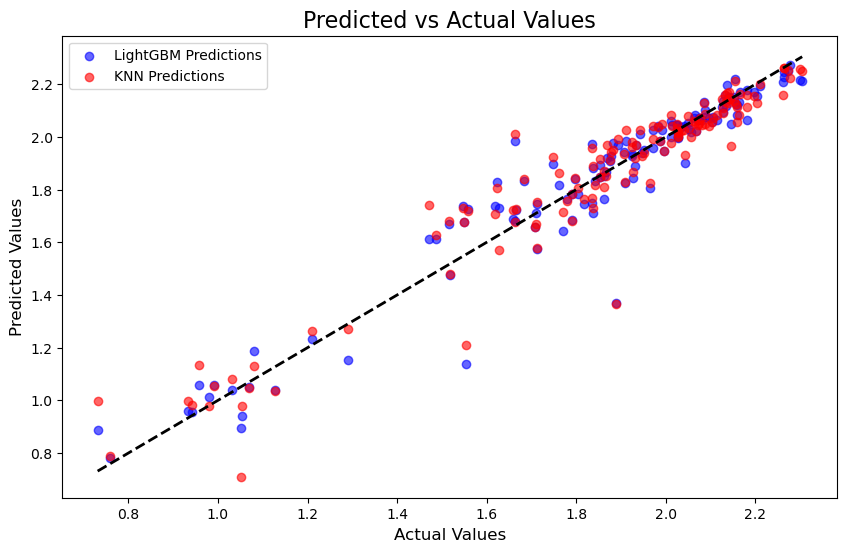

In [191]:
# Plotting Predicted vs Actual for both models

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_lgb, color='blue', label='LightGBM Predictions', alpha=0.6)

plt.scatter(y_test, y_pred_rf, color='red', label='KNN Predictions', alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.show()

In [193]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create the KNN model
knn_model = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

# Best model
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model
y_pred_knn = best_knn_model.predict(X_test)

# Performance metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - MAE: {mae_knn}")
print(f"KNN - MSE: {mse_knn}")
print(f"KNN - RMSE: {rmse_knn}")
print(f"KNN - R^2: {r2_knn}")


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
KNN - MAE: 0.08822094992953737
KNN - MSE: 0.01580053531266117
KNN - RMSE: 0.1257001802411642
KNN - R^2: 0.8726454185328245
